In [7]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Loading Dataset
from google.colab import files
uploaded = files.upload()

Saving Wine_data.csv to Wine_data (2).csv


In [9]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
           'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

In [10]:
df = pd.read_csv("Wine_data.csv")

In [11]:
# Checking the head of dataset
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
           'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
print(df.info())
print('-'*30)
print(df.columns)
print('-'*30)
print(df.head())
print('-'*30)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
------------------------------
Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlor

In [13]:
print('Empty cells in data')
print(df.isnull().sum())

Empty cells in data
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


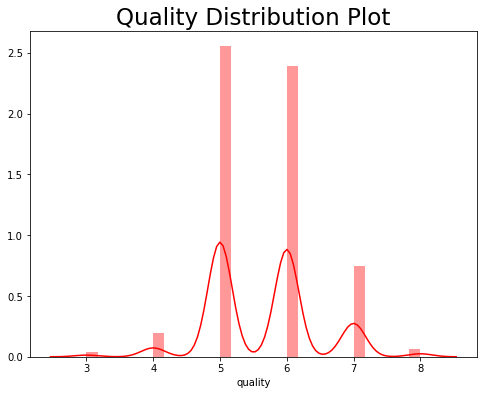

In [14]:
# Check Unique Quality
# create a distribution plot of quality
f0, ax = plt.subplots(figsize=(8, 6))
plt.title('Quality Distribution Plot',fontsize=23)
sns.distplot(df['quality'], color='red')

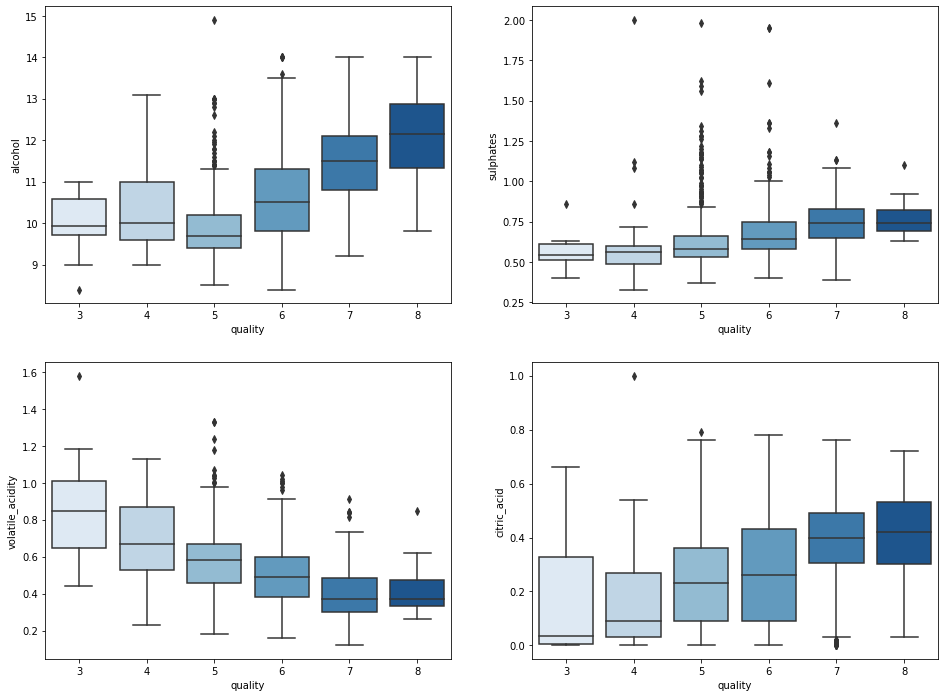

In [19]:
# create box plot for features
f2, ax = plt.subplots(2, 2, figsize=(16, 12))
sns.boxplot('quality', 'alcohol', data=df, ax=ax[0, 0], palette='Blues')
sns.boxplot('quality', 'sulphates', data=df, ax=ax[0, 1], palette='Blues')
sns.boxplot('quality', 'volatile_acidity', data=df, ax=ax[1, 0], palette='Blues')
sns.boxplot('quality', 'citric_acid', data=df, ax=ax[1, 1], palette='Blues')

In [20]:
# Drop quality feature from the dataset
df_dropped = df.drop('quality', axis=1)
X =df_dropped.values[:, 1:]
Clus_dataset = StandardScaler().fit_transform(X)

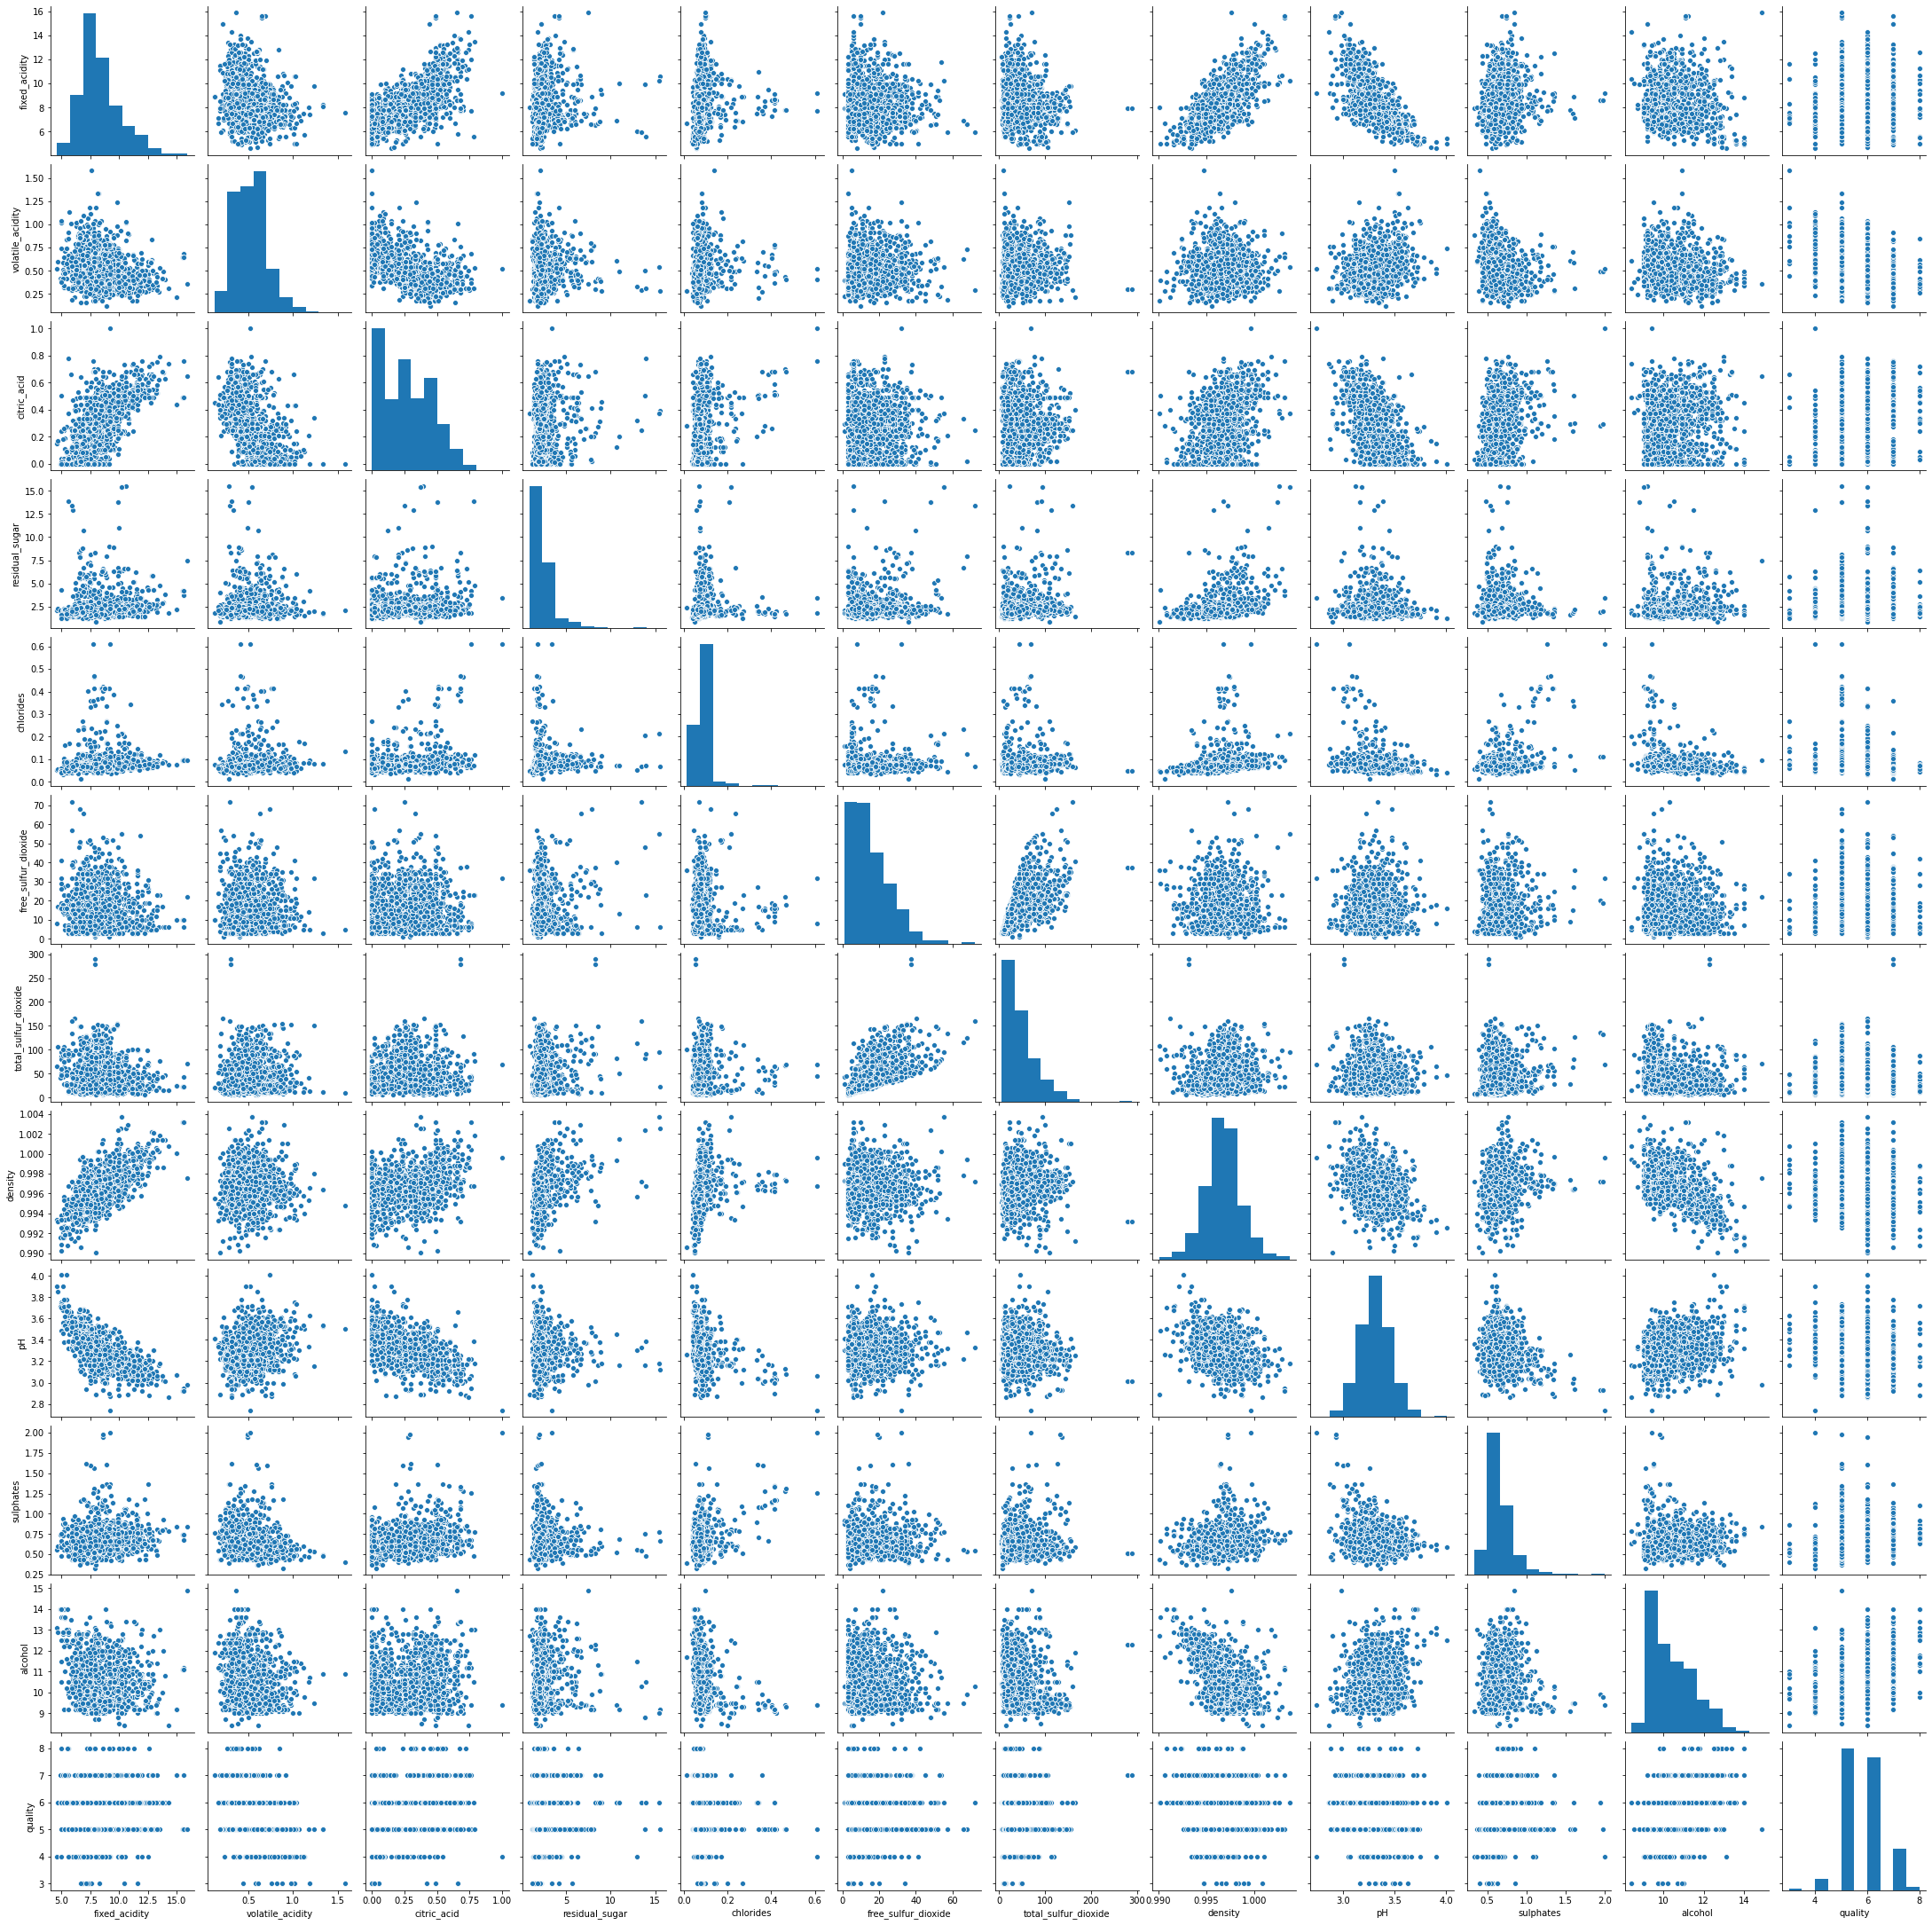

In [21]:
# Check pairplot
sns.pairplot(df)

In [22]:
# Scaling the dataset
Clus_dataset = StandardScaler().fit_transform(X)

PERFORM K MEANS CLUSTERING

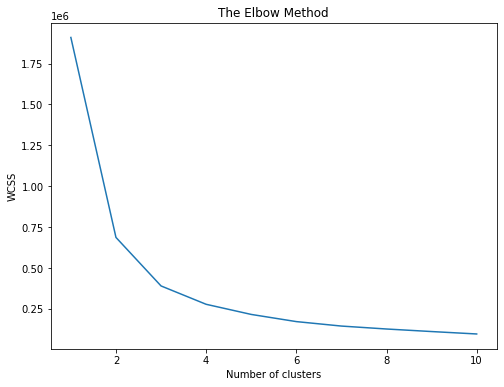

In [23]:
# To check optimal number of clusters
# Basically, number of clusters = the x-axis value of the point that is the corner of the "elbow"(the plot looks often looks like an elbow)
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
# expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
# build the model with the output from elbow method which is 2
# capturing the cluster lables
clusterNum = 2
k_means =KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 0 ... 0 0 0]


In [27]:
# Assigning the labels to each row in dataframe.
df_dropped['Clus_km'] = labels
print(df_dropped.head())

print(df_dropped.groupby('Clus_km').mean())

   fixed_acidity  volatile_acidity  citric_acid  ...  sulphates  alcohol  Clus_km
0            7.4              0.70         0.00  ...       0.56      9.4        0
1            7.8              0.88         0.00  ...       0.68      9.8        1
2            7.8              0.76         0.04  ...       0.65      9.8        0
3           11.2              0.28         0.56  ...       0.58      9.8        0
4            7.4              0.70         0.00  ...       0.56      9.4        0

[5 rows x 12 columns]
         fixed_acidity  volatile_acidity  ...  sulphates    alcohol
Clus_km                                   ...                      
0             8.424258          0.519334  ...   0.656531  10.540218
1             8.025952          0.551643  ...   0.662690  10.093889

[2 rows x 11 columns]


Text(0, 0.5, 'total sulfur dioxide')

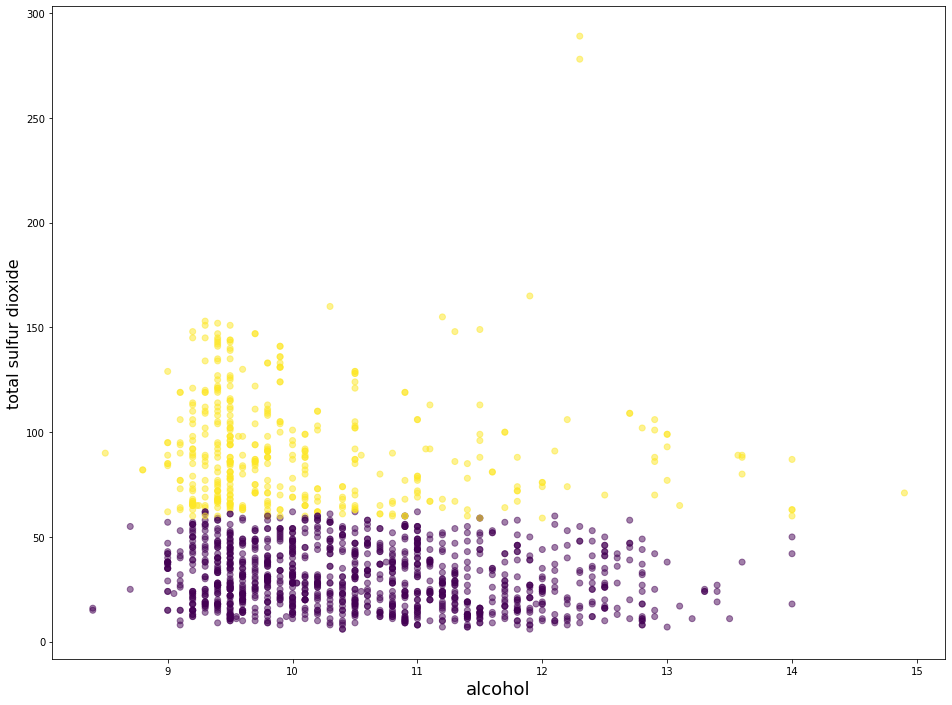

In [28]:
# combining the cluster_range and cluster_errors into a dataframe by combining them
# create 2 dimensional graph
f3, ax = plt.subplots(figsize=(16, 12))
plt.scatter(X[:, 9], X[:, 5], c=labels.astype(np.float), alpha=.5)
plt.xlabel('alcohol', fontsize=18)
plt.ylabel('total sulfur dioxide', fontsize=16)

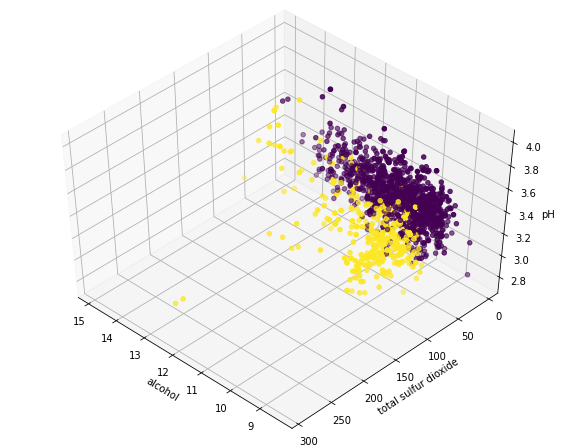

In [29]:
# creating 3 dimensional graph
from mpl_toolkits.mplot3d import Axes3D
f4 = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(f4, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('alcohol')
ax.set_ylabel('total sulfur dioxide')
ax.set_zlabel('pH')

ax.scatter(X[:, 9], X[:, 5], X[:, 7], c= labels.astype(np.float))

Using silhouette_Coefficient to Find best No of Cluster

In [34]:
from sklearn.metrics import silhouette_score

In [40]:
KMean= KMeans(n_clusters=2)
KMean.fit(X)
label=KMean.predict(X)

In [41]:
print(f'Silhouette Score(n=2): {silhouette_score(X, label)}')

Silhouette Score(n=2): 0.4215395001657011


In [43]:
# When there are 3 clusters
KMean= KMeans(n_clusters=3)
KMean.fit(X)
label=KMean.predict(X)
print(f'Silhouette Score(n=3): {silhouette_score(X, label)}')

Silhouette Score(n=3): 0.4010941639265813


<function matplotlib.pyplot.show>

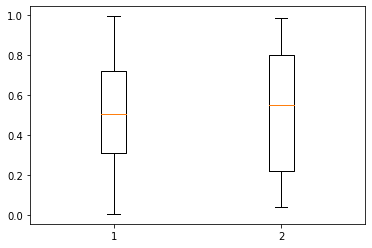

In [46]:
# Final boxplot
plt.boxplot(X)
plt.show

In [48]:
# Building a dendogram
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(df)
clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [49]:
clustering.labels_

array([1, 0, 1, ..., 1, 0, 1])

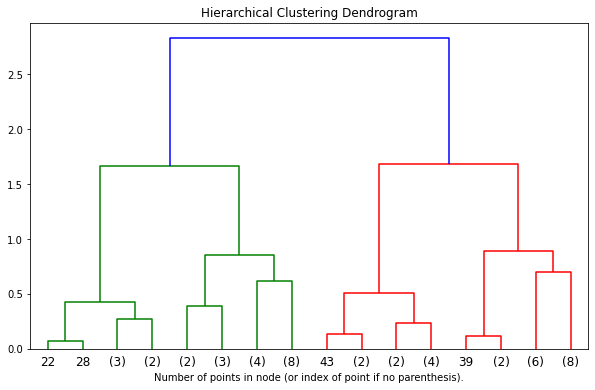

In [53]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)

plt.figure(figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()